# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install graphviz
import graphviz
import matplotlib.pyplot as plt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE
data = pd.read_csv(url, names=names)

# Dropping NaN rows
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)
data.head()

X_values = data[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
y_values = data['class']

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_high_depth = DecisionTreeClassifier(criterion='entropy', random_state = None, max_depth=50, min_samples_leaf=3)
decision_tree_high_depth.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=3)

Print accuracy of training and validation data.

In [ ]:
y_train_pred_high=decision_tree_high_depth.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_high)*100)
y_val_pred_high=decision_tree_high_depth.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_high)*100)

Training Accuracy is  94.8
Validation Accuracy is  76.19047619047619


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree_low_depth = DecisionTreeClassifier(criterion='entropy',random_state=None, max_depth=5, min_samples_leaf=50)
decision_tree_low_depth.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

Print accuracy of training and validation data.

In [ ]:
y_train_pred_low=decision_tree_low_depth.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_low)*100)
y_val_pred_low=decision_tree_low_depth.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_low)*100)

Training Accuracy is  77.2
Validation Accuracy is  73.01587301587301


Explain the accuracy results below. 

higher max-depth --> overfitted because there's a higher training accuracy, and both have the same validation accuracy

## Metrics

Plot the ROC curve and print the AUC of the second model.

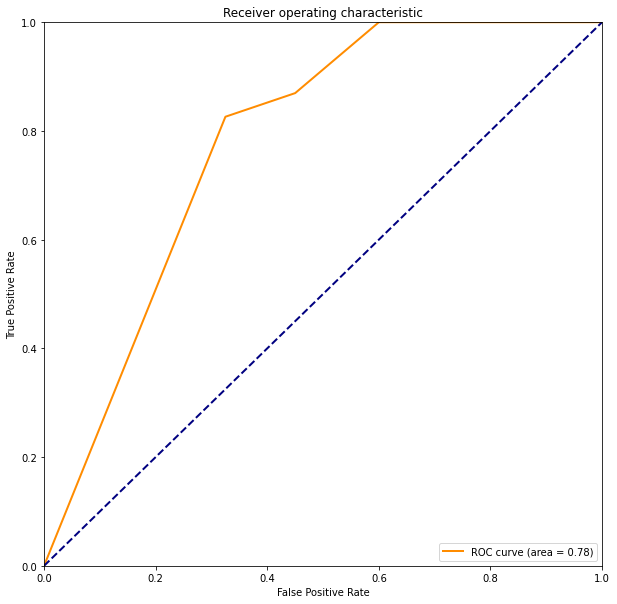

0.7804347826086957


In [ ]:
## YOUR CODE HERE
y_val_prob = decision_tree_low_depth.predict_proba(X_val,[0,1])
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

Use graphviz to visualize your 2nd tree.

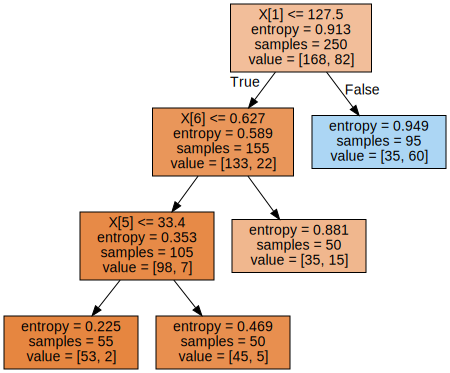

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree_low_depth, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

the value the data has to take on in order to be classified as true or false

Question 2: What is the root feature? Does it make sense as the root feature?

plas - plasma glucose concentration; its value is in the range of the values in 'plas'

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

overfit --> training accuracy would be near 100, and the testing accuracy would be relatively low, around 70s

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
new_decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)
new_decision_tree.fit(X_train, y_train)
new_y_train_pred=new_decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, new_y_train_pred)*100)
new_y_val_pred=new_decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val, new_y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE
# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
# Printing accuracy of testing & training data
y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779


How did the accuracy compare to the decision tree's accuracy?

The training accuracy for both sets are equal to 100 and that the validation accuracy for the second set is higher.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index=names[0:8])
forest_importances.sort_values(ascending=True,inplace=True)
print(forest_importances[0:3])

pres    0.066139
preg    0.070086
skin    0.098000
dtype: float64


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

In [ ]:
X_val.shape

(63, 8)

Training Accuracy is  90.8
Validation Accuracy is  77.77777777777779
Training Accuracy is  96.8
Validation Accuracy is  69.84126984126983
Training Accuracy is  98.8
Validation Accuracy is  77.77777777777779
Training Accuracy is  98.8
Validation Accuracy is  76.19047619047619
Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095
Training Accuracy is  99.6
Validation Accuracy is  77.77777777777779
Training Accuracy is  99.6
Validation Accuracy is  76.19047619047619
Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779
Training Accuracy is  100.0
Validation Accuracy is  77.77777777777779
Training Accuracy is  99.6
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.0
Validation Accuracy is  80.95238095238095
Training Accuracy is  100.0
Validation Accuracy is  79.36507936507937
Training Accuracy is  100.0
Validation Accuracy is  82.53968253968253
Training Accuracy is  100.0

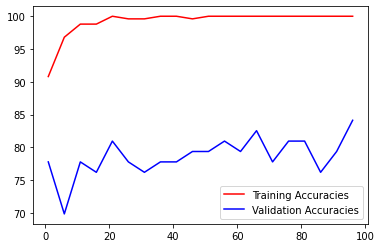

In [ ]:
## YOUR CODE HERE
x_vals = []
y_training_acc = []
y_val_acc = []
for i in range(1,100,5):
    # Creating a model w sklearn's RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=i)

    # Training/fitting the model with training data
    random_forest.fit(X_train, y_train)
    x_vals.append(i)
    y_train_pred=random_forest.predict(X_train)
    print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
    y_val_pred=random_forest.predict(X_val)
    print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
    y_training_acc.append(accuracy_score(y_train, y_train_pred)*100)
    y_val_acc.append(accuracy_score(y_val,y_val_pred)*100)

plt.plot(x_vals, y_training_acc, "r-", label="Training Accuracies")
plt.plot(x_vals, y_val_acc, "b-", label="Validation Accuracies")
plt.legend()
plt.show()

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

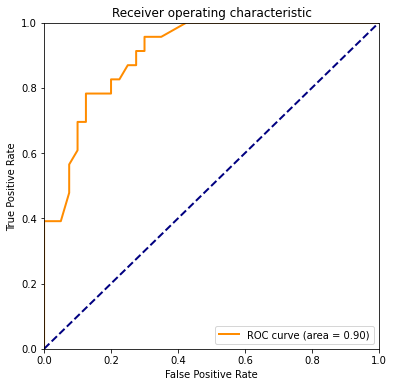

0.9038043478260869


In [ ]:
## YOUR CODE HERE
y_val_prob = random_forest.predict_proba(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print(roc_auc)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6682294-4076-472f-b6a3-592ed81e5f9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>